In [1]:

import os
import glob
import sys
import random
import cv2

import matplotlib.pylab as plt
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np

from sklearn.model_selection import ShuffleSplit, train_test_split

np.random.seed(0)
random.seed(0)

%matplotlib inline

In [2]:
afad_path = '/home/Data/AFAD_Dataset'
utk_path = '/home/Data/UTK_Face_Dataset'
aaf_path = '/home/Data/All_Age_Faces'

image_path_utk_1 = 'interim/part1/cropped'
image_path_utk_2 = 'interim/part2/cropped'
image_path_utk_3 = 'interim/part3/cropped'

image_path_aaf = 'interim/cropped'

image_path_afad = 'interim'

utk_df_1 = pd.read_csv(utk_path + '/processed/part1/utk_face.csv')

utk_df_1['file_name'] = utk_df_1['file_name'].apply(lambda x: os.path.join(utk_path, image_path_utk_1, x))
utk_df_1 = utk_df_1[['file_name', 'age', 'gender']]

utk_df_2 = pd.read_csv(utk_path + '/processed/part2/utk_face.csv')

utk_df_2['file_name'] = utk_df_2['file_name'].apply(lambda x: os.path.join(utk_path, image_path_utk_2, x))
utk_df_2 = utk_df_2[['file_name', 'age', 'gender']]

utk_df_3 = pd.read_csv(utk_path + '/processed/part3/utk_face.csv')

utk_df_3['file_name'] = utk_df_3['file_name'].apply(lambda x: os.path.join(utk_path, image_path_utk_3, x))
utk_df_3 = utk_df_3[['file_name', 'age', 'gender']]

aaf_df_1 = pd.read_csv(aaf_path + '/processed/train.csv')

aaf_df_1['file_name'] = aaf_df_1['file_name'].apply(lambda x: os.path.join(aaf_path, image_path_aaf, x))
aaf_df_1 = aaf_df_1[['file_name', 'age', 'gender']]

aaf_df_2 = pd.read_csv(aaf_path + '/processed/val.csv')

aaf_df_2['file_name'] = aaf_df_2['file_name'].apply(lambda x: os.path.join(aaf_path, image_path_aaf, x))
aaf_df_2 = aaf_df_2[['file_name', 'age', 'gender']]

afad_df = pd.read_csv(afad_path + '/processed/afad.csv')

afad_df['file_name'] = afad_df['file_name'].apply(lambda x: os.path.join(afad_path, image_path_afad, x))
afad_df = afad_df[['file_name', 'age', 'gender']]


df_lst = [utk_df_1, utk_df_2, utk_df_3, aaf_df_1, aaf_df_2, afad_df]

all_df = pd.concat(df_lst)

In [3]:
all_df.reset_index(inplace=True, drop = True)

In [4]:
all_df = all_df[~all_df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [5]:
all_df['age'] = all_df['age'].apply(lambda x: int(x))
all_df['gender'] = all_df['gender'].apply(lambda x: int(x))

In [6]:
all_df

,file_name,age,gender
0,/home/Data/UTK_Face_Dataset/interim/part1/crop...,14,0
1,/home/Data/UTK_Face_Dataset/interim/part1/crop...,22,0
2,/home/Data/UTK_Face_Dataset/interim/part1/crop...,32,0
3,/home/Data/UTK_Face_Dataset/interim/part1/crop...,69,0
4,/home/Data/UTK_Face_Dataset/interim/part1/crop...,36,1
...,...,...,...
201428,/home/Data/AFAD_Dataset/interim/859178-1.jpg,64,1
201429,/home/Data/AFAD_Dataset/interim/857255-0.jpg,64,1
201430,/home/Data/AFAD_Dataset/interim/855820-0.jpg,64,1
201431,/home/Data/AFAD_Dataset/interim/856548-0.jpg,64,1


In [7]:
example = cv2.imread(aaf_df_1['file_name'][100])

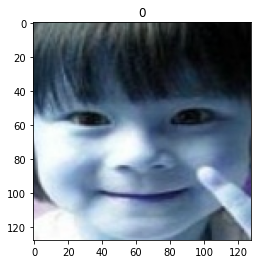

In [8]:
plt.imshow(example)
plt.title(aaf_df_1['gender'][100])
plt.show()

In [24]:
# utk_df_1['gender'] = utk_df_1['gender'].apply(lambda x: 1 if x == 0 else 0)
# utk_df_2['gender'] = utk_df_2['gender'].apply(lambda x: 1 if x == 0 else 0)
# utk_df_3['gender'] = utk_df_3['gender'].apply(lambda x: 1 if x == 0 else 0)

In [25]:
# utk_df_1.to_csv(utk_path + '/processed/part1/utk_face.csv')
# utk_df_2.to_csv(utk_path + '/processed/part2/utk_face.csv')
# utk_df_3.to_csv(utk_path + '/processed/part3/utk_face.csv')

<AxesSubplot:xlabel='gender', ylabel='count'>

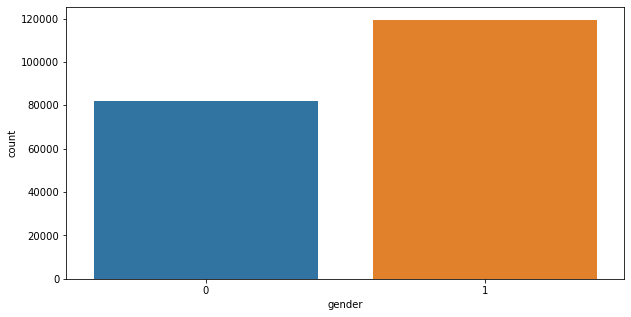

In [9]:
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data = all_df)

In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201432 entries, 0 to 201432
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   file_name  201432 non-null  object
 1   age        201432 non-null  int64 
 2   gender     201432 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.1+ MB


In [11]:
all_df.describe()

,age,gender
count,201432.000000,201432.000000
mean,27.144565,0.592503
std,10.401811,0.491370
min,1.000000,0.000000
25%,21.000000,0.000000
50%,25.000000,1.000000
75%,32.000000,1.000000
max,116.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='count'>

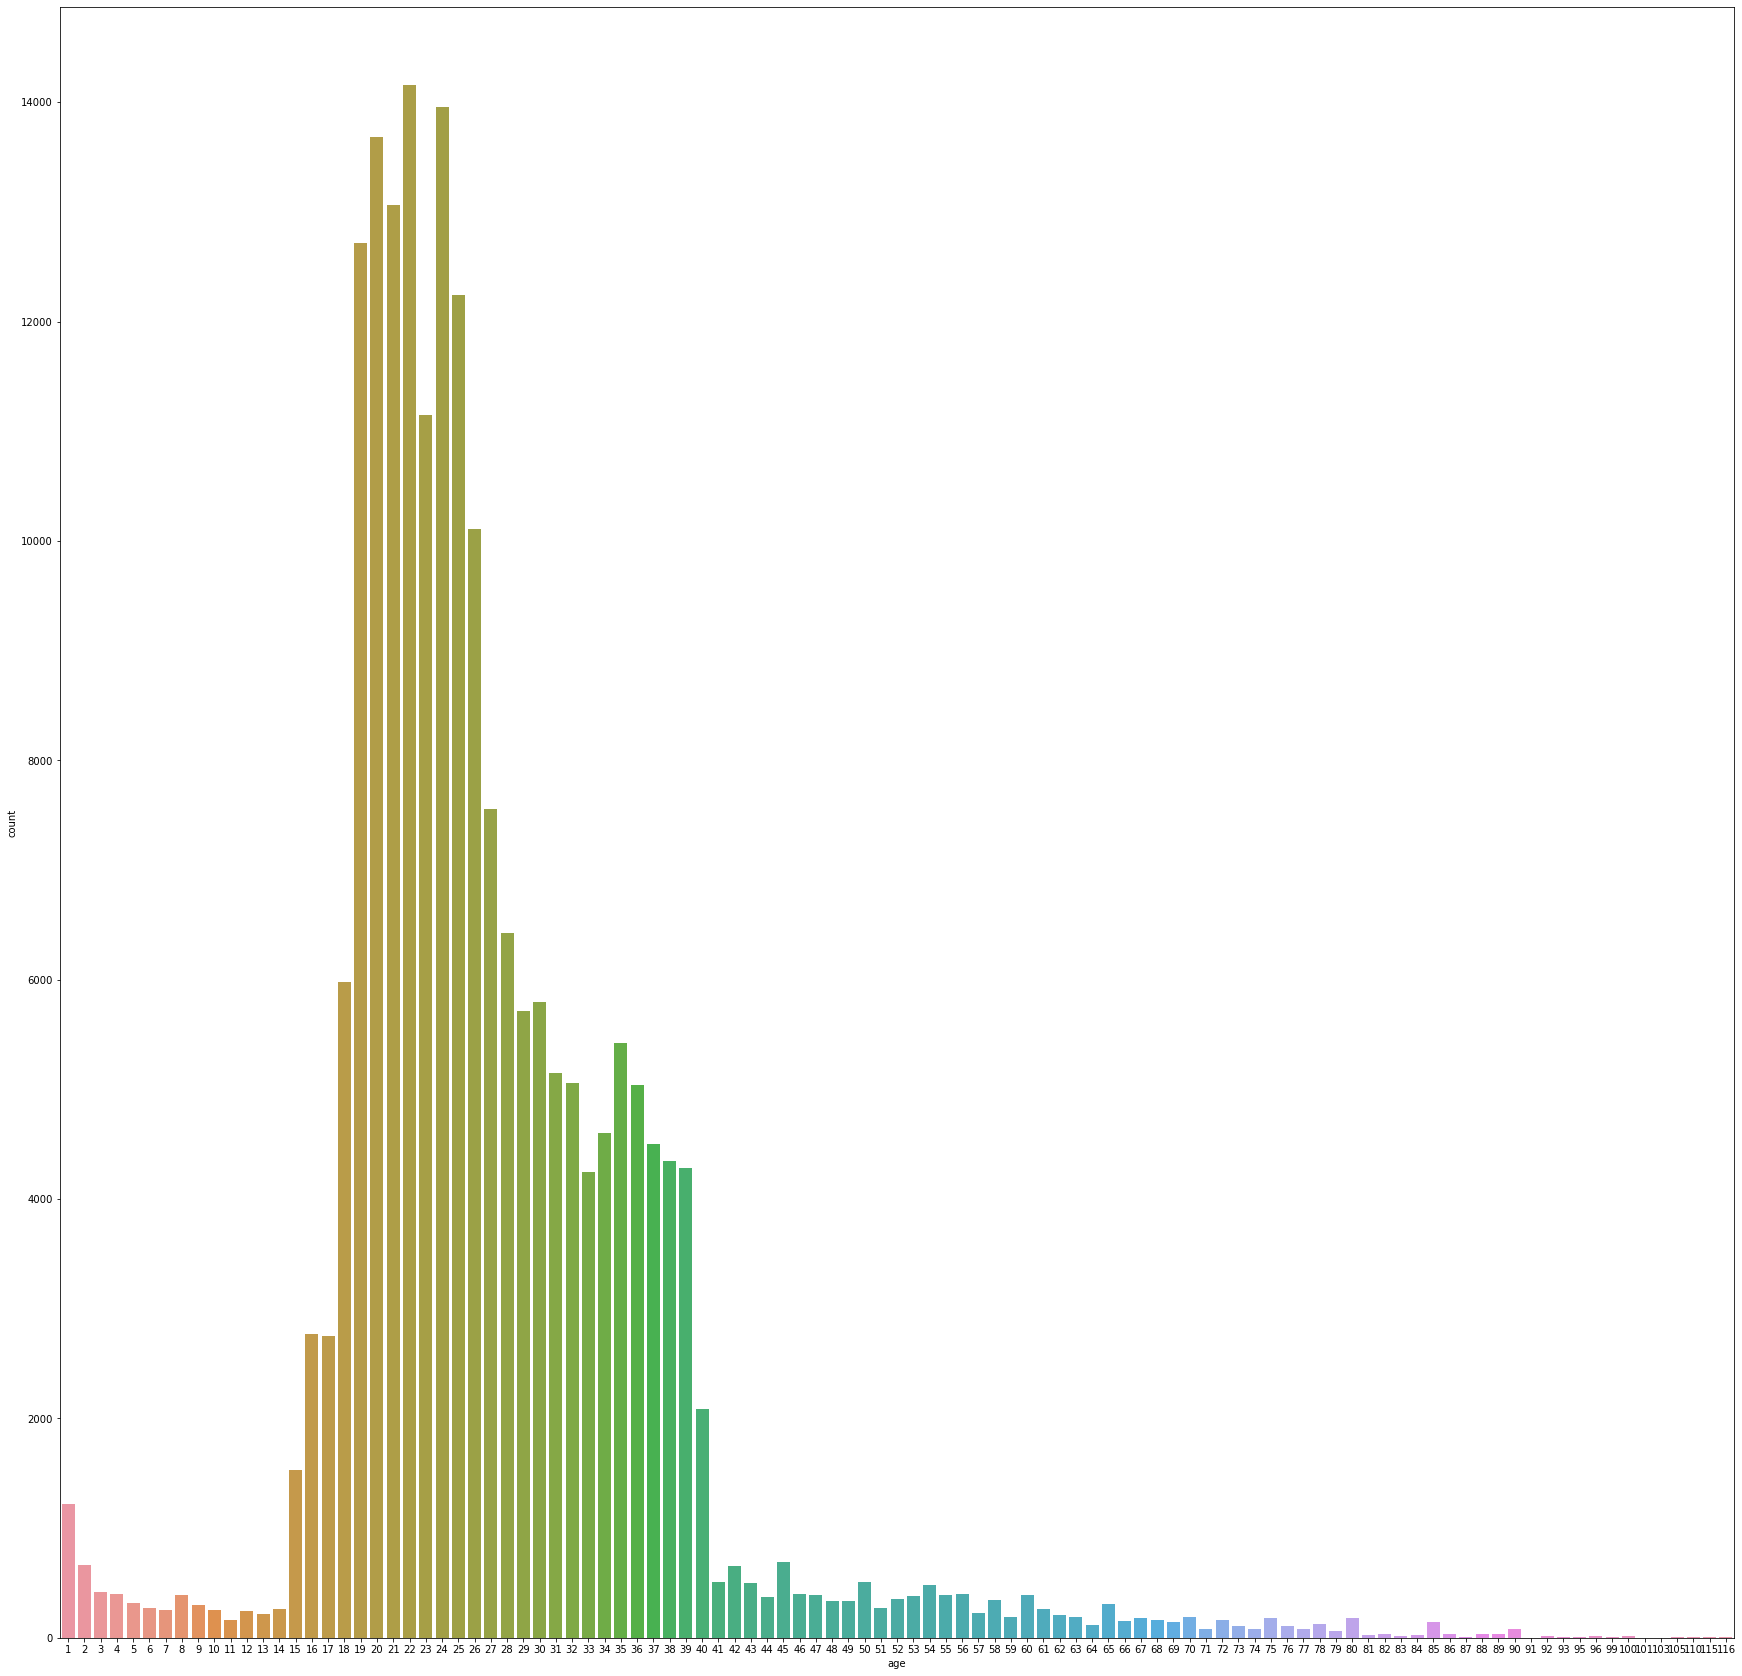

In [12]:
import seaborn as sns

plt.figure(figsize = (30, 30))
sns.countplot(x='age', data = all_df)

In [13]:
!pwd

/home/anhduy/face-attributes/notebooks


In [39]:
# all_df.to_csv('/home/Data/training_dataset.csv')

In [42]:
# appa_df_1 = pd.read_csv('/home/Data/appa-real/processed/train.csv')
# appa_df_2 = pd.read_csv('/home/Data/appa-real/processed/valid.csv')
# appa_df_3 = pd.read_csv('/home/Data/appa-real/processed/test.csv')

In [43]:
# all_val_df = pd.concat([appa_df_1, appa_df_2, appa_df_3])

In [46]:
# val_df, test_df = train_test_split(all_val_df, test_size=0.5, random_state=42)

In [47]:
# val_df.to_csv('/home/Data/valid_dataset.csv')
# test_df.to_csv('/home/Data/testing_dataset.csv')